In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
year=["2021","2016","2011"]
area=['Roxbury','Mattapan','Dorchester']
x=["Less 10 mins","10-14 mins","14-19 mins","20-24 mins","25-29 mins","30-34 mins", "35-44 mins","45-59 mins","60 and more"]
combined_df = pd.DataFrame()
c=[]
for a in area:
    for y in year:
        df=pd.read_csv("./data/q2/{}_data_{}.csv".format(a,y),index_col="Label (Grouping)")
        df=df.astype("str")
        df = df.apply(lambda x: x.str.replace(',', ''))
        # boston=df[['Label (Grouping)',"Boston city, Massachusetts!!Estimate"]]
        # cambridge=df[['Label (Grouping)',"Cambridge city, Massachusetts!!Estimate"]]
        df = df.iloc[:, 0::2].apply(pd.to_numeric, errors='coerce')
        roxbury= df.iloc[:, 0::2].sum(axis=1)
        roxbury.reset_index(drop=True, inplace=True)
        combined_df = pd.concat([combined_df, roxbury], axis=1)
        c.append("{}_{}".format(a,y))



In [3]:
combined_df.columns=c
combined_df.index=df.index
df=combined_df
df_total=df.iloc[1:10,:]
df_bus=df.iloc[71:80,:]


In [4]:
df

,Roxbury_2021,Roxbury_2016,Roxbury_2011,Mattapan_2021,Mattapan_2016,Mattapan_2011,Dorchester_2021,Dorchester_2016,Dorchester_2011
Label (Grouping),,,,,,,,,
Total:,11474,10640,8719,6925,6778,6129,27753,27321,23383
Less than 10 minutes,799,1088,816,217,105,240,1463,1197,1320
10 to 14 minutes,820,1096,718,278,379,271,2018,2068,2059
15 to 19 minutes,1321,1388,963,564,569,530,2734,2876,2265
20 to 24 minutes,1117,1375,1461,805,805,669,3466,3554,3050
...,...,...,...,...,...,...,...,...,...
25 to 29 minutes,51,0,51,0,45,0,46,31,23
30 to 34 minutes,43,30,28,11,15,0,66,63,164
35 to 44 minutes,17,8,21,29,0,38,6,10,15


In [5]:
df_total_per=df_total/df.iloc[0,:]
df_bus_per=df_bus/df.iloc[70,:]

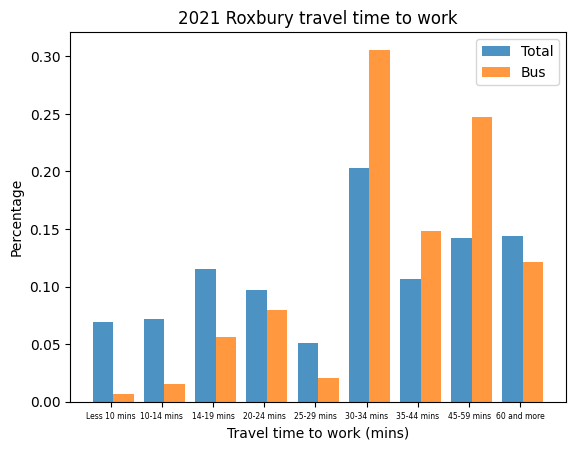

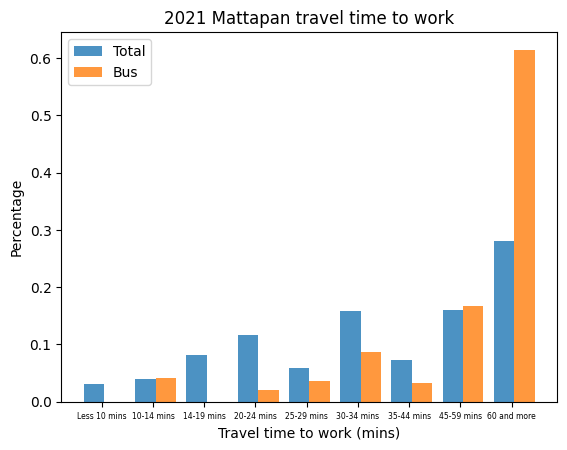

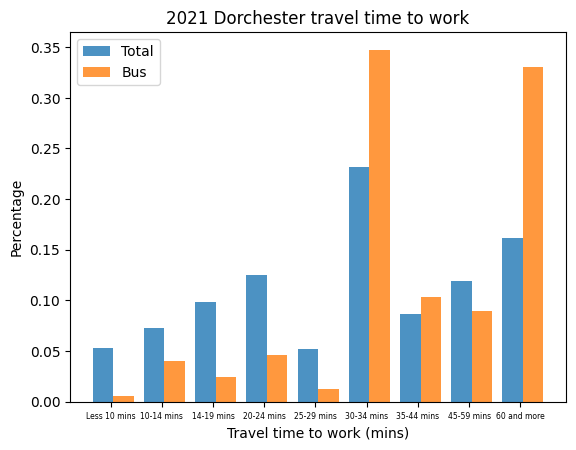

In [6]:
label = x
index = np.arange(len(label))
ti = index - 0.4

for a in area:
    fig, axe = plt.subplots()
    values1 = df_total_per["{}_2021".format(a)]
    values2 = df_bus_per["{}_2021".format(a)]
    axe.bar(index, values1, width=0.4, label="Total", alpha=0.8)
    axe.bar(index + 0.4, values2, width=0.4, label="Bus", alpha=0.8)
    axe.set_xticks(index + 0.15)
    axe.set_xticklabels(label)

    axe.set_xticks(index + 0.15)
    axe.set_xticklabels(label)

    plt.xticks(fontsize=5.5)
    plt.ylabel("Percentage")
    plt.xlabel("Travel time to work (mins)")
    plt.title("2021 {} travel time to work".format(a))
    plt.legend()
    plt.show()

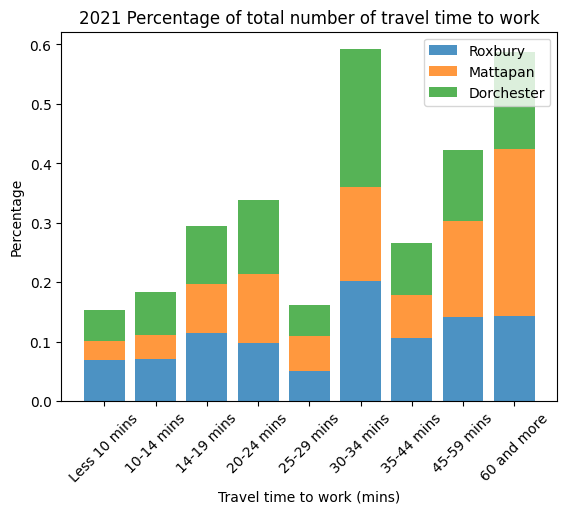

In [7]:
data_by_area = []

for a in area:
    data = df_total_per['{}_2021'.format(a)]
    data_by_area.append(data)

# Convert data to numpy arrays for plotting
data_by_area = np.array(data_by_area)

# Create a stacked bar chart
plt.bar(x, data_by_area[0], label='Roxbury', alpha=0.8)
for i in range(1, len(area)):
    plt.bar(x, data_by_area[i], label=area[i], bottom=np.sum(data_by_area[:i], axis=0), alpha=0.8)

plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.xlabel("Travel time to work (mins)")
plt.title("2021 Percentage of total number of travel time to work")
plt.legend(loc="upper right")

plt.show()

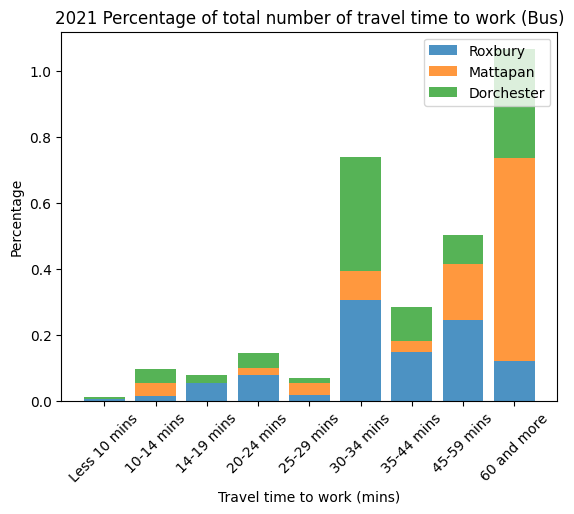

In [8]:
data_by_area = []

for a in area:
    data = df_bus_per['{}_2021'.format(a)]
    data_by_area.append(data)

# Convert data to numpy arrays for plotting
data_by_area = np.array(data_by_area)

# Create a stacked bar chart
plt.bar(x, data_by_area[0], label='Roxbury', alpha=0.8)
for i in range(1, len(area)):
    plt.bar(x, data_by_area[i], label=area[i], bottom=np.sum(data_by_area[:i], axis=0), alpha=0.8)

plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.xlabel("Travel time to work (mins)")
plt.title("2021 Percentage of total number of travel time to work (Bus)")
plt.legend(loc="upper right")

plt.show()

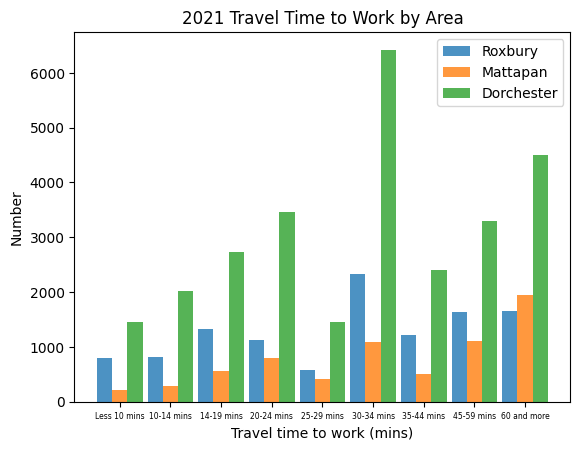

In [9]:
fig, axe = plt.subplots()


label = x
index = np.arange(len(label))-0.3
ti=index
for a in area:

    values1 = df_total["{}_2021".format(a)]
    ti+=0.3
    axe.bar(ti, values1, width=0.3,label="{}".format(a),alpha=.8)
axe.set_xticks(index-0.3)
axe.set_xticklabels(label)

plt.xticks(fontsize=5.5)
plt.ylabel("Number")
plt.xlabel("Travel time to work (mins)")
plt.title("2021 Travel Time to Work by Area")
# plt.title("2021 Percentage of total number of travel time to work")
plt.legend()
plt.show()

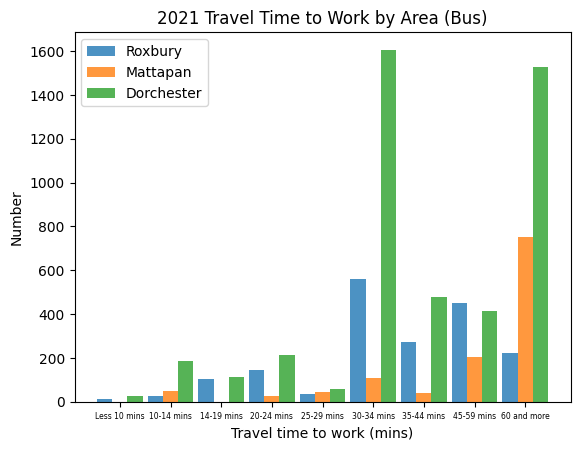

In [10]:
fig, axe = plt.subplots()


label = x
index = np.arange(len(label))-0.3
ti=index
for a in area:

    values1 = df_bus["{}_2021".format(a)]
    ti+=0.3
    axe.bar(ti, values1, width=0.3,label="{}".format(a),alpha=.8)
axe.set_xticks(index-0.3)
axe.set_xticklabels(label)

plt.xticks(fontsize=5.5)
plt.ylabel("Number")
plt.xlabel("Travel time to work (mins)")
plt.title("2021 Travel Time to Work by Area (Bus)")
# plt.title("2021 Percentage of total number of travel time to work")
plt.legend()
plt.show()

In [11]:
df_total_per["{}_{}".format(a,y)][0]

C:\Users\85816\AppData\Local\Temp\ipykernel_15876\1959876970.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_total_per["{}_{}".format(a,y)][0]


0.05645126801522474

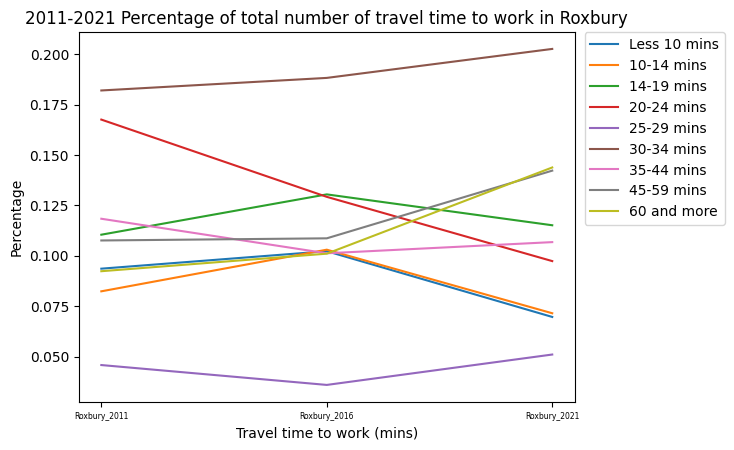

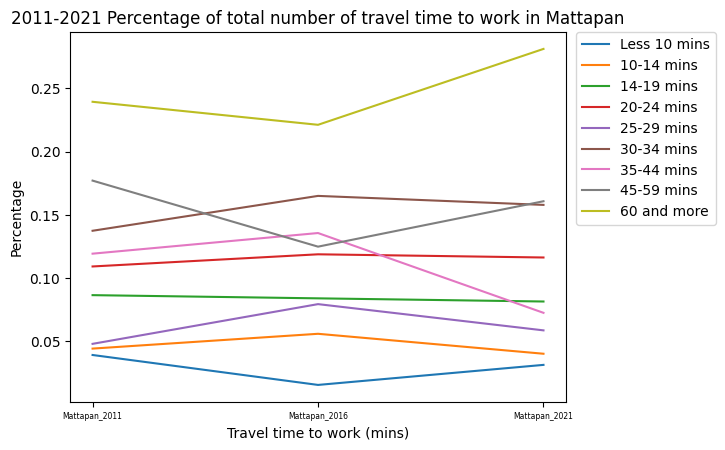

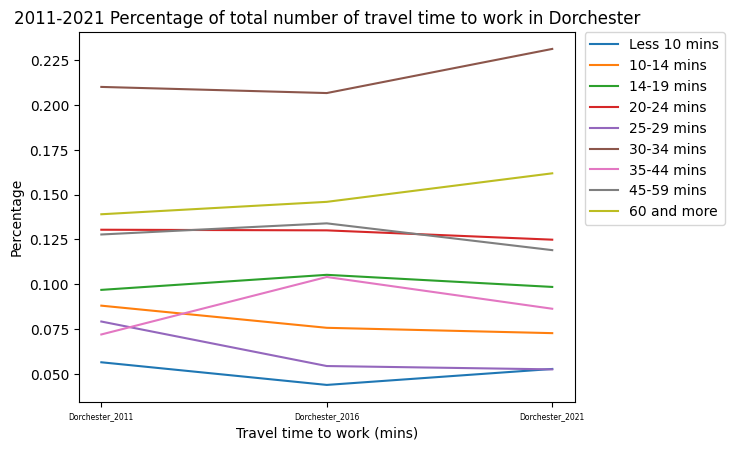

In [12]:
for a in area:
    fig, axe = plt.subplots()
    index = range(len(label))

    for i in range(len(label)):
        data = df_total_per[["{}_2011".format(a), "{}_2016".format(a), "{}_2021".format(a)]].iloc[i]
        axe.plot(data, label=label[i])

    plt.xticks(fontsize=5.5)
    plt.ylabel("Percentage")
    plt.xlabel("Travel time to work (mins)")
    plt.title("2011-2021 Percentage of total number of travel time to work in {}".format(a))
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

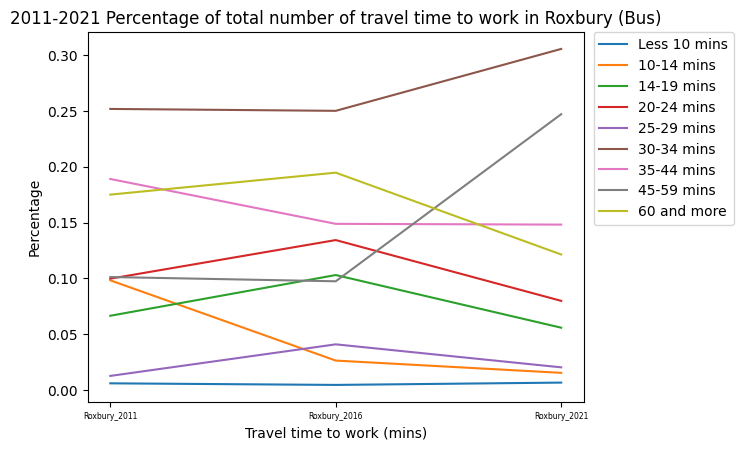

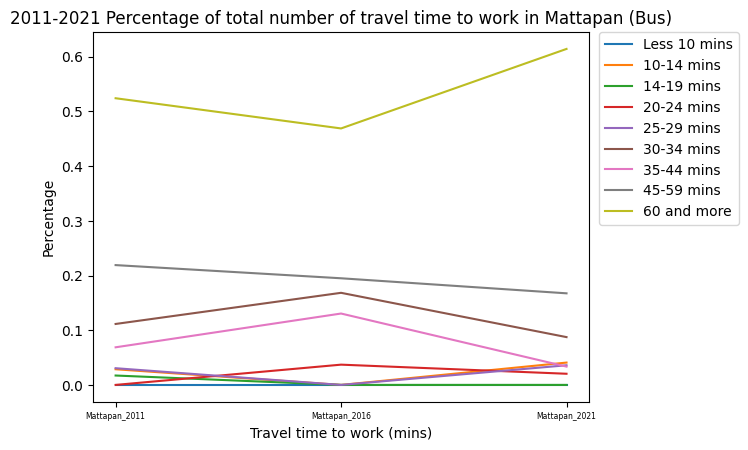

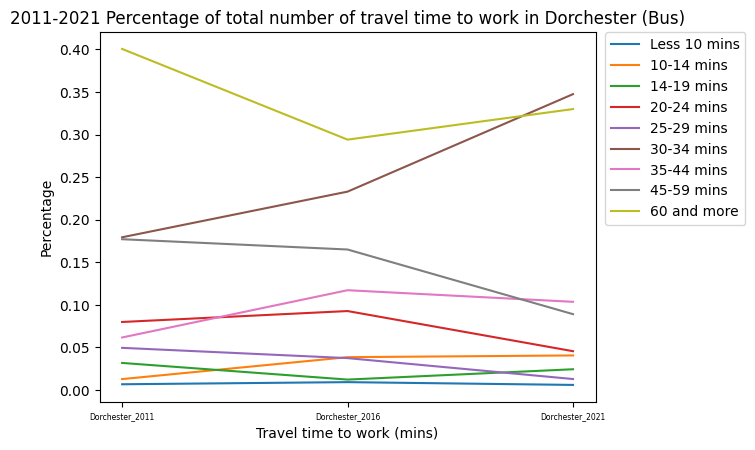

In [13]:
for a in area:
    fig, axe = plt.subplots()
    index = range(len(label))

    for i in range(len(label)):
        data = df_bus_per[["{}_2011".format(a), "{}_2016".format(a), "{}_2021".format(a)]].iloc[i]
        axe.plot(data, label=label[i])

    plt.xticks(fontsize=5.5)
    plt.ylabel("Percentage")
    plt.xlabel("Travel time to work (mins)")
    plt.title("2011-2021 Percentage of total number of travel time to work in {} (Bus)".format(a))
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()